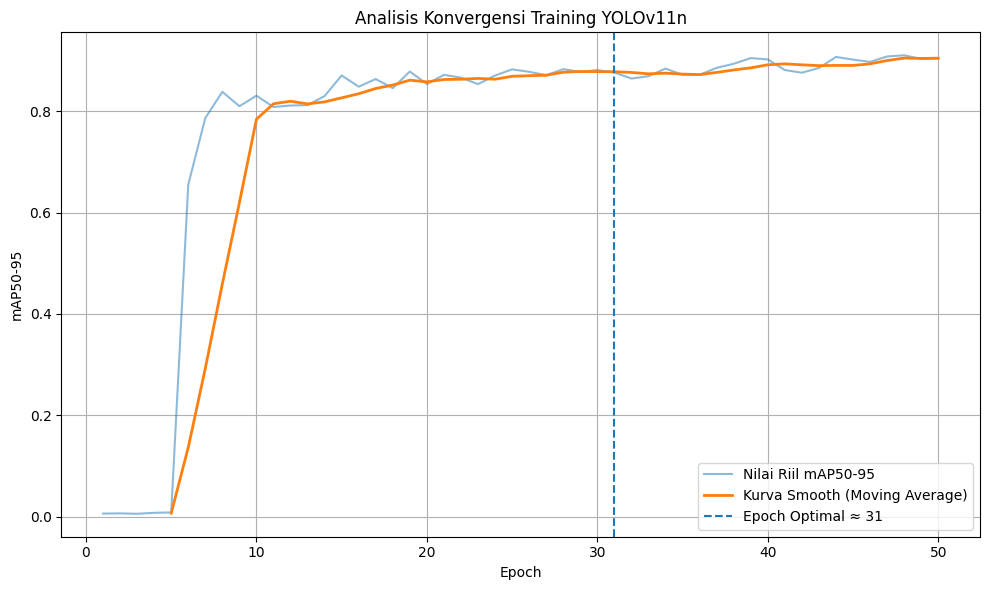

Peningkatan mAP50-95 mulai sangat kecil sejak sekitar epoch ke-31


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 1. Load results.csv
# =========================
csv_path = "results.csv"
# contoh Colab:
# csv_path = "/content/drive/MyDrive/yolov11_training/30-epoch/results.csv"

df = pd.read_csv(csv_path)

epoch = df["epoch"].values
map5095 = df["metrics/mAP50-95(B)"].values

# =========================
# 2. Smooth curve (moving average)
# =========================
window_size = 5
smooth_map = np.convolve(
    map5095,
    np.ones(window_size) / window_size,
    mode="valid"
)

smooth_epoch = epoch[window_size - 1:]

# =========================
# 3. Hitung gradien smooth curve
# =========================
gradient = np.gradient(smooth_map)

# =========================
# 4. Deteksi epoch henti (early stop analysis)
# =========================
grad_threshold = 0.001   # peningkatan sangat kecil
patience = 3             # berturut-turut

stop_epoch = None
counter = 0

for i, g in enumerate(gradient):
    if abs(g) < grad_threshold:
        counter += 1
        if counter >= patience:
            stop_epoch = smooth_epoch[i]
            break
    else:
        counter = 0

# =========================
# 5. Plot grafik
# =========================
plt.figure(figsize=(10, 6))

plt.plot(epoch, map5095, label="Nilai Riil mAP50-95", alpha=0.5)
plt.plot(smooth_epoch, smooth_map, label="Kurva Smooth (Moving Average)", linewidth=2)

if stop_epoch is not None:
    plt.axvline(
        x=stop_epoch,
        linestyle="--",
        label=f"Epoch Optimal ≈ {stop_epoch}"
    )

plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.title("Analisis Konvergensi Training YOLOv11n")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("map5095_smooth_analysis.png")
plt.show()

# =========================
# 6. Output analisis
# =========================
if stop_epoch is not None:
    print(f"Peningkatan mAP50-95 mulai sangat kecil sejak sekitar epoch ke-{stop_epoch}")
else:
    print("Tidak ditemukan titik plateau yang jelas berdasarkan threshold")
